In [2]:
import os   #gpu추가
import tensorflow as tf 
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

In [3]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

500


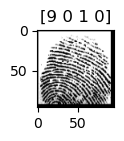

In [9]:
img_list = sorted(glob.glob('Dataimg/Real/*.BMP'))#파일경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)
    
np.save('dataset/x_real.npz', imgs)     #npz로 파일 저장해야해서 수정
#np.save('dataset/y_real.npy', labels)

#show image
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [4]:
img_list = sorted(glob.glob('Dataimg/Altered/Altered-Easy/*.BMP'))      #파일 경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)         #1추가해봄
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96, 1))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_easy.npz', x=imgs, y=1)         #npz로 파일 저장해야해서 수정
np.save('dataset/y_easy.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

1488


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\gpwns\anaconda3\envs\engpu\lib\site-packages\IPython\core\interactiveshell.py", line 3552, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\gpwns\AppData\Local\Temp\ipykernel_7728\2475022276.py", line 9, in <module>
    img = cv2.resize(img, (96, 96, 1))
cv2.error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\gpwns\anaconda3\envs\engpu\lib\site-packages\IPython\core\interactiveshell.py", line 2098, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'error' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent cal

In [ ]:
img_list = sorted(glob.glob('Dataimg/Altered/Altered-Medium/*.BMP'))#파일 경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.save('dataset/x_medium.npz', imgs)       #npz로 파일 저장해야해서 수정
#np.save('dataset/y_medium.npy', labels)

#show image
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [ ]:
img_list = sorted(glob.glob('Dataimg/Altered/Altered-Hard/*.BMP'))#경로 수정
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.save('dataset/x_hard.npz', imgs)             #npz로 파일 저장해야해서 수정
np.save('dataset/y_hard.npy', labels)

#show image
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')